# Intermediate step check

Get n # of random points in a specific geographic region with associated gap times



## Setup Imports

(not relevant to repo, can skip) 

Adding module path to run correctly in examples folder

In [1]:
import sys
import os

# Add the path to the folder containing the module
module_path = os.path.abspath(os.path.join('..'))
print(module_path)
if module_path not in sys.path:
    sys.path.append(module_path)

/Users/gracekim/Documents/School_Everything_and_LEARNING/Stanford/Githubs/loc-gsopt/src


## Imports

In [2]:
"""
Get n # of random points in a specific geographic region with associated gap times
"""

from common.sat_gen import satellites_from_constellation
from common.station_gen import gs_json,return_bdm_gs
from common.utils import load_earth_data, compute_all_gaps_contacts

from scipy.optimize import minimize
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt

# Brahe Imports
import brahe as bh
import brahe.data_models as bdm
import brahe.access.access as ba


## Setup 

In [4]:
############################### SETUP: ###############################

# Make sure to load in earth inertial data every start time!
load_earth_data('data/iau2000A_finals_ab.txt')

############################### STEP 1: Satellites ###############################

# Loading in a satellite constellation 
CONSTELLATIONS = sorted(['YAM', 'UMBRA', 'SKYSAT', 'ICEYE', 'FLOCK', 'HAWK', 'CAPELLA', 'LEGION', 'WORLDVIEW', 'GEOEYE',
                  'NUSAT'])

constellation = 'CAPELLA'

satellites = satellites_from_constellation(constellation)

############################### STEP 2: Scenario Generation ###############################

# Setting up Epochs
epc_start = bh.Epoch(2025, 4, 1, 17, 23, 40.69) # This is the epoch of the orbital elements
epc_end = epc_start + 86400*7 # checking over one week




Loading the latest Earth Orientation Data


# Generating 100 Ground Stations and Contacts

In [ ]:

from common.utils import mp_compute_contact_times
import random

lats = []
longs = []
gaps = []

gs_list = [[-27.56967231631279, -56.19024431705475]]

gs_bdm_list = [return_bdm_gs(-27.56967231631279, -56.19024431705475)]
gs_contacts_og = 0
_,gs_contacts_og = mp_compute_contact_times(satellites, gs_bdm_list ,epc_start, epc_end, False)

for i in range(100):
    # Latitude: Uniform sampling between -90 and 90 degrees
    lat = random.uniform(-90, 90)
    
    # Longitude: Uniform sampling between -180 and 180 degrees
    lon = random.uniform(-180, 180)
    
    # gs = rlp.random_points('Europe')[0]
    # lon = gs[0]
    # lat = gs[1]
    
    all_contacts, contacts_sec = mp_compute_contact_times(satellites, [return_bdm_gs(lon, lat)] ,epc_start, epc_end, False)
    # _, contacts_exclusion_secs = contactExclusion(all_contacts+ gs_contacts_og,cfg)
    cost_func_val = 0 - (np.sum(contacts_sec)+ np.sum(gs_contacts_og))


#     penalty_water = (penalty(new_gs,land_geometries)/1000)**2 # Put penalty/distance from land in 10 kms
#     penalty_close_gs = (penalty_gs_all(new_gs,gs_list, cfg.constraints.dist_other_gs))**2 # additional penalty being close to gs, in ms
#     value = cost_func_val + penalty_water + penalty_close_gs

    lats.append(lat)
    longs.append(lon)
    print(lat,lon)
    gaps.append(cost_func_val)
    print(cost_func_val)

-56.261818734731044 141.45510200988912
-105232.302244
-51.88882203676664 -87.37438278409113
-117138.34898900002
-39.277300758545906 81.537089342375
-133842.899769
67.58031570291817 5.908768518104807
-83008.03343800001
83.62190179691717 148.35738796618227
-95550.58776200001
-1.2929996891186732 73.5819853398794
-95987.735593
88.76151391697852 -60.67678016033187
-99013.04625700001
76.89998255622382 107.67174030239357
-85730.69275000002
-64.72936132119673 -86.40374748216922
-87766.062011
78.8581240425585 92.95473562856353
-87087.39624500001
-39.27743559758486 -167.8638089235923
-131193.554065
64.40486836568289 -122.0799831336642
-86987.53417000001
86.75837315177759 178.58293491447546
-98319.166247
82.98113715023999 -42.71278450982982
-94479.136956
-40.3437180048066 10.922979038605348
-134326.657091
32.7154299194231 -31.68731015010954
-120639.13878600001
-67.82312381963115 57.80258534898849
-84463.94530400001
-23.826682805181406 -154.08880014060756
-102882.14720800001
9.727248216464417 -123

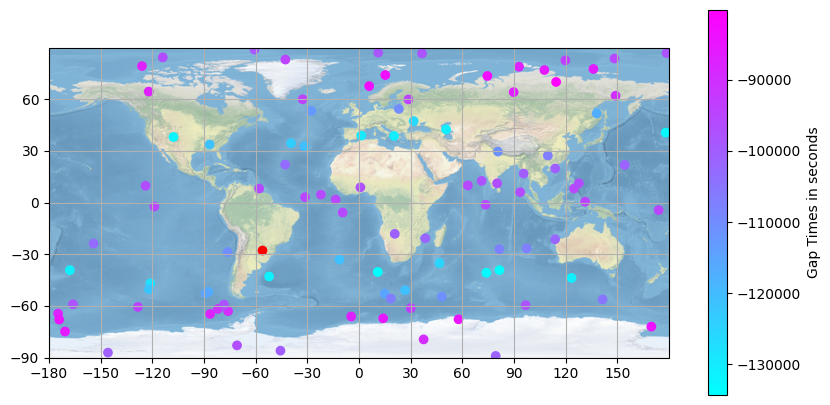

In [12]:
# Plotting Imports

import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import numpy as np

# Create the figure
fig = plt.figure(figsize=(10,5))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.grid(True)
ax.set_global()
ax.stock_img()
c = 'b' # Set the plot color

# gs_list = [[92.44410570135645, -90.0], [-73.01224079830891, -89.95426045890125], [-4.078723407808447, -89.95514937821778], [-20.501266626711264, -89.91355093899406], [-159.10268897441438, -89.95438003369789], [-115.71665466969782, -89.93402443627843], [-48.87503465712989, -89.90572106322753], [-180.0, -89.91518762080831], [-149.7087766419795, -89.91006098768894], [-77.3218705116782, -89.90973730577142]]
ax.set_yticks(np.arange(-90, 90, 30))
ax.set_xticks(np.arange(-180, 180, 30))

og_longs = [gs[0] for gs in gs_list]
og_lats = [gs[1] for gs in gs_list]
sc = ax.scatter(x=longs, y=lats, c=gaps,cmap = 'cool')
ss = ax.scatter(x = og_lats, y = og_longs, c = "red")
cbar = fig.colorbar(sc)
cbar.set_label('Gap Times in seconds')
